# Module 20 - Capstone Part 1

## 1- Business Understanding

As an avid golfer and a 4 handicap, I understand the value of working on every part of the game. However, too many people focus only on specifics like hitting the ball as far as possible and neglect other parts of their training. Hiring a specialized coach is expensive, where do we put the efforts to have the biggest return? What aspect of the game should we work on first?

In this module, we will look at the stats from the PGA tour and try to answer the following questions: 

a) Are there categories or aspects of the game that are more important than others?

b) What features or qualities a golfer should focus on and train to make it to the next level?


## 2- Data Understanding

The data comes from the PGA tour and is available for everyone to download at: https://www.pgatour.com/stats

There are tons of categories and data for years from 2008 to 2024. Some categories have data older than that but the target goes back to 2008 only. That's when the PGA tour initiated the tour championship where the 30 best players face off in a championship event. This is going to be our target. 

Based on all the features, did a player make it to the tour championship?

On top of the target, we will use the following features to build our dataset:

- Tee to green stats, which includes strokes gained off the tee, strokes gained on approach and strokes gained around the green
- Putting stats
- Driving stats, which include distance, accuracy, smash factor, rough tendency, percentage of yardage covered, spin rate, apex, distance from the edge of fairway, clubhead speed, carry distance and carry efficiency
- Approach to green stats, which include green in regulation, GIR under 75 yard, GIR over 200 yards, GIR from the bunker, GIR from other areas, Going for it, proximity to the hole, proximity from under 100 yard, proximity from over 275 yards and proximity from the rough.
- Scrambling stats

## 3- Data Preparation

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

### Load all data

Below you will see that I use a loop to load all years in a different dataframe, which has the years in the name. Then I load all the stats and results (target). I also verify that my data loaded properly with a couple of samples from the first and last year.

### Tee to green stats

In [397]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/SG_TTG/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_TTG_SG.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_ttg_{0}".format(year)] = []
    variables["df_ttg_{0}".format(year)] = dataframe
    variables["df_ttg_{0}".format(year)]['year'] = int(year)



In [1446]:
df_ttg_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,SG:OTT,SG:APR,SG:ARG,MEASURED ROUNDS,year
0,1,0,46046,Scottie Scheffler,2.615,1.021,1.194,0.399,74,2023
1,2,0,28237,Rory McIlroy,1.938,0.907,0.721,0.309,58,2023


In [1448]:
df_ttg_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,SG:OTT,SG:APR,SG:ARG,MEASURED ROUNDS,year
0,1,0,6567,Vijay Singh,2.339,0.870,1.116,0.352,89,2004
1,2,0,21209,Sergio Garcia,1.908,0.606,1.211,0.091,50,2004


### Putting Stats 

In [405]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/SG_Putting/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_SG_Putting.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_putting_{0}".format(year)] = []
    variables["df_putting_{0}".format(year)] = dataframe
    variables["df_putting_{0}".format(year)]['year'] = int(year)

In [1450]:
df_putting_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL SG:PUTTING,MEASURED ROUNDS,year
0,1,0,46442,Maverick McNealy,0.956,46.822,49,2023
1,2,0,55789,Taylor Montgomery,0.919,78.103,85,2023


In [1452]:
df_putting_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL SG:PUTTING,MEASURED ROUNDS,year
0,1,0,1928,Corey Pavin,0.973,54.489,56,2008
1,2,0,2223,Bob Tway,0.822,46.854,57,2008


### Driving Stats

In [413]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/TotalDriving/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_TotalDriving.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_driving_{0}".format(year)] = []
    variables["df_driving_{0}".format(year)] = dataframe
    variables["df_driving_{0}".format(year)]['year'] = int(year)

In [1454]:
df_driving_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,TOTAL,DISTANCE RANK,ACCURACY RANK,year
0,1,0,52955,Ludvig Åberg,33,6,27,2023
1,2,0,39546,Keith Mitchell,62,14,48,2023


In [1458]:
df_driving_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,TOTAL,DISTANCE RANK,ACCURACY RANK,year
0,1,0,22892,Jason Gore,56,15,41,2008
1,2,0,23349,Charles Warren,85,10,75,2008


In [423]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/SmashFactor/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Smash_Fac.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Smash_Fac_{0}".format(year)] = []
    variables["df_Smash_Fac_{0}".format(year)] = dataframe
    variables["df_Smash_Fac_{0}".format(year)]['year'] = int(year)

In [1461]:
df_Smash_Fac_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL SMASH FACTOR,TOTAL ATTEMPTS,HIGHEST VALUE,LOWEST VALUE,year
0,1,0,49453,Trevor Cone,1.521,378.785,249,1.538,0.0,2023
1,2,0,49766,Hank Lebioda,1.519,236.984,156,1.537,0.0,2023


In [1463]:
df_Smash_Fac_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL SMASH FACTOR,TOTAL ATTEMPTS,HIGHEST VALUE,LOWEST VALUE,year
0,1,0,2206,David Toms,1.478,79.795,54,1.516,1.463,2008
1,2,0,10505,Shane Bertsch,1.477,131.465,89,1.493,1.447,2008


In [429]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/RoughT/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_RoughTendency.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_RoughTendency_{0}".format(year)] = []
    variables["df_RoughTendency_{0}".format(year)] = dataframe
    variables["df_RoughTendency_{0}".format(year)]['year'] = int(year)

In [1467]:
df_RoughTendency_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,TOTAL ROUGH,POSSIBLE FWYS,RELATIVE TO PAR,year
0,1,0,32816,Satoshi Kodaira,20.84%,124,595,+0.48,2023
1,2,0,34098,Russell Henley,21.79%,222,1019,+1.53,2023


In [1465]:
df_RoughTendency_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,TOTAL ROUGH,POSSIBLE FWYS,RELATIVE TO PAR,year
0,1,0,1139,Olin Browne,15.58,151,969,2.85,2008
1,2,0,1388,Robert Gamez,19.86,194,977,2.01,2008


In [606]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/PY_Tee/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_PercYard_TeeShot.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_PercYard_TeeShot_{0}".format(year)] = []
    variables["df_PercYard_TeeShot_{0}".format(year)] = dataframe
    variables["df_PercYard_TeeShot_{0}".format(year)]['year'] = int(year)

In [1469]:
df_PercYard_TeeShot_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG (%),TOTAL SHOT DISTANCE,TOTAL DISTANCE,year
0,1,0,28237,Rory McIlroy,66.90%,251263.5,375605,2023
1,2,0,57366,Cameron Young,66.70%,289812.7,434532,2023


In [1473]:
df_PercYard_TeeShot_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG (%),TOTAL SHOT DISTANCE,TOTAL DISTANCE,year
0,1,0,27141,J.B. Holmes,65.96,2927079,443741,2008
1,2,0,30925,Dustin Johnson,65.25,3343769,512436,2008


In [612]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/SpinRate/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Dr_SpinRate.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Dr_SpinRate_{0}".format(year)] = []
    variables["df_Dr_SpinRate_{0}".format(year)] = dataframe
    variables["df_Dr_SpinRate_{0}".format(year)]['year'] = int(year)

In [622]:
df_Dr_SpinRate_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL SPIN SPEED,TOTAL ATTEMPTS,year
0,1,0,40058,Zac Blair,3082.9,2099474,681,2023
1,2,0,47347,Adam Schenk,2958.2,2224596,752,2023


In [1475]:
df_Dr_SpinRate_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL SPIN SPEED,TOTAL ATTEMPTS,year
0,1,0,12823,Carlos Franco,3286.1,105156,32,2008
1,2,0,23540,Jason Allred,3156.4,113631,36,2008


In [681]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/Apex/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Dr_Apex.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Dr_Apex_{0}".format(year)] = []
    variables["df_Dr_Apex_{0}".format(year)] = dataframe
    variables["df_Dr_Apex_{0}".format(year)]['year'] = int(year)

In [685]:
df_Dr_Apex_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL APEX HEIGHT,TOTAL ATTEMPTS,year
0,1,0,51491,Brandon Matthews,"137' 6""","40419' 8""",294,2023
1,2,0,32102,Rickie Fowler,"127' 9""","74743' 10""",585,2023


In [687]:
df_Dr_Apex_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL APEX HEIGHT,TOTAL ATTEMPTS,year
0,1,0,8375,Paul Stankowski,"121' 0""","2782' 9""",23,2007
1,2,0,25273,Andrew Buckle,"117' 0""","5969' 0""",51,2007


In [689]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/Dist_EdgeFair/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Dist_EdgeFair.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Dist_EdgeFair_{0}".format(year)] = []
    variables["df_Dist_EdgeFair_{0}".format(year)] = dataframe
    variables["df_Dist_EdgeFair_{0}".format(year)]['year'] = int(year)

In [691]:
df_Dist_EdgeFair_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (FEET),TOTAL STROKES,year
0,1,0,50525,Collin Morikawa,"19' 4""",4897.50,253,2023
1,2,0,26596,Ryan Moore,"19' 11""",5262.75,264,2023


In [693]:
df_Dist_EdgeFair_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (FEET),TOTAL STROKES,year
0,1,0,1142,Bart Bryant,"16' 11""",3055.50,181,2008
1,2,0,24024,Zach Johnson,"17' 3""",3957.75,229,2008


In [820]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/Speed/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_CH_Speed.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_CH_Speed_{0}".format(year)] = []
    variables["df_CH_Speed_{0}".format(year)] = dataframe
    variables["df_CH_Speed_{0}".format(year)]['year'] = int(year)

In [822]:
df_CH_Speed_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL CLUB HEAD SPEED,TOTAL ATTEMPTS,year
0,1,0,51491,Brandon Matthews,126.51,14549.07,115,2023
1,2,0,52372,Cameron Champ,126.07,22693.09,180,2023


In [1477]:
df_CH_Speed_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL CLUB HEAD SPEED,TOTAL ATTEMPTS,year
0,1,0,27141,J.B. Holmes,125.16,5507.02,44,2008
1,2,0,25804,Bubba Watson,123.89,8300.78,67,2008


In [826]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/Carry_Dist/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Carry_Dist.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Carry_Dist_{0}".format(year)] = []
    variables["df_Carry_Dist_{0}".format(year)] = dataframe
    variables["df_Carry_Dist_{0}".format(year)]['year'] = int(year)

In [828]:
df_Carry_Dist_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DIST. TO IMPACT,TOTAL ATTEMPTS,year
0,1,0,51491,Brandon Matthews,313.3,80216.3,256,2023
1,2,0,58696,Peter Kuest,307.8,85267.4,277,2023


In [1479]:
df_Carry_Dist_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DIST. TO IMPACT,TOTAL ATTEMPTS,year
0,1,0,27141,J.B. Holmes,307.9,12622.0,41,2008
1,2,0,20848,Ángel Cabrera,301.6,8446.1,28,2008


In [833]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Driving/Carry_Eff/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Carry_Eff.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Carry_Eff_{0}".format(year)] = []
    variables["df_Carry_Eff_{0}".format(year)] = dataframe
    variables["df_Carry_Eff_{0}".format(year)]['year'] = int(year)

In [835]:
df_Carry_Eff_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,AVERAGE CARRY DIST. YARDS,AVERAGE CLUB HEAD SPEED,TOTAL ATTEMPTS,HIGHEST CARRY EFFICIENCY,year
0,1,0,33141,Keegan Bradley,2.560,294.8,115.153,250,221402832,2023
1,2,0,32102,Rickie Fowler,2.546,296.3,116.340,258,225202873,2023


In [1481]:
df_Carry_Eff_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,AVERAGE CARRY DIST. YARDS,AVERAGE CLUB HEAD SPEED,TOTAL ATTEMPTS,HIGHEST CARRY EFFICIENCY,year
0,1,0,20848,Ángel Cabrera,2.494,301.6,120.926,28,194702757,2008
1,2,0,24358,Robert Garrigus,2.485,301.5,121.333,62,225702782,2008


### Approach to Green

In [840]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Approach/GIR/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_GIR.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_GIR_{0}".format(year)] = []
    variables["df_GIR_{0}".format(year)] = dataframe
    variables["df_GIR_{0}".format(year)]['year'] = int(year)

In [842]:
df_GIR_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,# HOLES,RELATIVE/PAR,year
0,1,0,46046,Scottie Scheffler,74.43%,1179,1584,-0.32,2023
1,2,0,58696,Peter Kuest,73.79%,611,828,-0.32,2023


In [1483]:
df_GIR_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,# HOLES,RELATIVE/PAR,year
0,1,0,6621,Joe Durant,71.1,1075,1512,-0.20,2008
1,2,0,10885,Robert Allenby,70.4,1356,1926,-0.24,2008


In [847]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Approach/GIR_75/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_GIR_75.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_GIR_75_{0}".format(year)] = []
    variables["df_GIR_75_{0}".format(year)] = dataframe
    variables["df_GIR_75_{0}".format(year)]['year'] = int(year)

In [849]:
df_GIR_75_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,TOTAL HOLES,RELATIVE TO PAR,year
0,1,0,40058,Zac Blair,94.66%,124,131,-0.65,2023
1,2,0,23108,Matt Kuchar,94.00%,188,200,-0.64,2023


In [1485]:
df_GIR_75_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,TOTAL HOLES,RELATIVE TO PAR,year
0,1,0,6527,Steve Stricker,95.45,105,110,-0.67,2008
1,2,0,10423,Mike Weir,94.67,142,150,-0.62,2008


In [853]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Approach/GIR_200/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_GIR_200.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_GIR_200_{0}".format(year)] = []
    variables["df_GIR_200_{0}".format(year)] = dataframe
    variables["df_GIR_200_{0}".format(year)]['year'] = int(year)

In [855]:
df_GIR_200_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,TOTAL HOLES,RELATIVE TO PAR,year
0,1,0,39335,Kevin Roy,59.29%,67,113,-0.06,2023
1,2,0,39997,Corey Conners,58.11%,86,148,-0.01,2023


In [1487]:
df_GIR_200_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,TOTAL HOLES,RELATIVE TO PAR,year
0,1,0,20645,John Senden,58.88,116,197,-0.04,2008
1,2,0,12716,Charley Hoffman,58.18,96,165,-0.04,2008


In [859]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Approach/GIR_Bunker/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_GIR_Bunk.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_GIR_Bunk_{0}".format(year)] = []
    variables["df_GIR_Bunk_{0}".format(year)] = dataframe
    variables["df_GIR_Bunk_{0}".format(year)]['year'] = int(year)

In [861]:
df_GIR_Bunk_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,# HOLES,RELATIVE/PAR,year
0,1,0,39954,Cody Gribble,73.8%,31,42,-4.00,2023
1,2,0,24140,Sean O'Hair,66.7%,14,21,-2.00,2023


In [1489]:
df_GIR_Bunk_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,# HOLES,RELATIVE/PAR,year
0,1,0,21209,Sergio Garcia,64.7,22,34,-6.00,2008
1,2,0,12782,Tim Herron,57.9,44,76,-10.00,2008


In [1491]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Approach/GIR_Other/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_GIR_Other.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_GIR_Other_{0}".format(year)] = []
    variables["df_GIR_Other_{0}".format(year)] = dataframe
    variables["df_GIR_Other_{0}".format(year)]['year'] = int(year)

In [867]:
df_GIR_Other_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,# OF HOLES,year
0,1,0,32366,Kevin Chappell,62.07%,216,348,2023
1,2,0,27129,Luke List,61.65%,389,631,2023


In [1493]:
df_GIR_Other_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,GREENS HIT,# OF HOLES,year
0,1,0,21805,Harrison Frazar,60.39,218,361,2008
1,2,0,21633,Steve Allan,58.76,171,291,2008


In [871]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Approach/Going/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_GoingFor.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_GoingFor_{0}".format(year)] = []
    variables["df_GoingFor_{0}".format(year)] = dataframe
    variables["df_GoingFor_{0}".format(year)]['year'] = int(year)

In [873]:
df_GoingFor_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,ATTEMPTS,NON-ATTEMPTS,RTP-GOING FOR THE GREEN,RTP-NOT GOING FOR THE GRN,year
0,1,0,35450,Patrick Cantlay,76.17%,179,56,-120,-14,2023
1,2,0,39067,MJ Daffue,74.91%,215,72,-122,+8,2023


In [1495]:
df_GoingFor_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,ATTEMPTS,NON-ATTEMPTS,RTP-GOING FOR THE GREEN,RTP-NOT GOING FOR THE GRN,year
0,1,0,24358,Robert Garrigus,72.90,234,87,-140,+9,2008
1,2,0,27095,Nick Watney,69.03,234,105,-136,+10,2008


In [877]:
variables = locals()

filepath = "C:/Users/Eric/Documents/Golf/Approach/ProximityHole/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_ProxiHole.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_ProxiHole_{0}".format(year)] = []
    variables["df_ProxiHole_{0}".format(year)] = dataframe
    variables["df_ProxiHole_{0}".format(year)]['year'] = int(year)

In [879]:
df_ProxiHole_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (FEET),# OF ATTEMPTS,GIR RANK,year
0,1,0,25900,Lucas Glover,"32' 7""",46443.25,1427,T14,2023
1,2,0,52955,Ludvig Åberg,"33' 4""",26905.75,807,3,2023


In [881]:
df_ProxiHole_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (FEET),# OF ATTEMPTS,GIR RANK,year
0,1,0,23135,Tim Clark,"30' 9""",38814.250,1262,Under,2004
1,2,0,1381,Fred Funk,"31' 2""",45852.667,1472,Under,2004


In [885]:

filepath = "C:/Users/Eric/Documents/Golf/Approach/Proxi275/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Proxi275.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Proxi275_{0}".format(year)] = []
    variables["df_Proxi275_{0}".format(year)] = dataframe
    variables["df_Proxi275_{0}".format(year)]['year'] = int(year)

In [887]:
df_Proxi275_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (FEET),# OF ATTEMPTS,RELATIVE TO PAR,year
0,1,0,47988,Nick Hardy,"52' 1""",833.50,16,-5,2023
1,2,0,47591,Eric Cole,"58' 7""",1582.25,27,-15,2023


In [1497]:
df_Proxi275_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (FEET),# OF ATTEMPTS,RELATIVE TO PAR,year
0,1,0,1945,Kenny Perry,"60' 9""",1153.917,19,-12,2008
1,2,0,24358,Robert Garrigus,"65' 1""",1431.750,22,-16,2008


In [891]:
filepath = "C:/Users/Eric/Documents/Golf/Approach/Proxi100/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Proxi100.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Proxi100_{0}".format(year)] = []
    variables["df_Proxi100_{0}".format(year)] = dataframe
    variables["df_Proxi100_{0}".format(year)]['year'] = int(year)

In [893]:
df_Proxi100_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (FEET),# OF ATTEMPTS,RELATIVE TO PAR,year
0,1,0,32839,Hideki Matsuyama,"12' 11""",1017.500,79,-0.43,2023
1,2,0,26596,Ryan Moore,"13' 3""",929.583,70,-0.19,2023


In [1499]:
df_Proxi100_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (FEET),# OF ATTEMPTS,RELATIVE TO PAR,year
0,1,0,1928,Corey Pavin,"12' 10""",1117.917,87,-0.18,2008
1,2,0,23108,Matt Kuchar,"13' 5""",1421.083,106,-0.29,2008


In [897]:
filepath = "C:/Users/Eric/Documents/Golf/Approach/ProxiRough/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_ProxiRough.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_ProxiRough_{0}".format(year)] = []
    variables["df_ProxiRough_{0}".format(year)] = dataframe
    variables["df_ProxiRough_{0}".format(year)]['year'] = int(year)

In [899]:
df_ProxiRough_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (INCHES),ATTEMPTS,TOTAL DISTANCE (FEET),RELATIVE TO PAR,year
0,1,0,39067,MJ Daffue,"38' 10""",144932,311,12077.667,+1.00,2023
1,2,0,32366,Kevin Chappell,"39' 0""",77202,165,6433.500,+1.00,2023


In [1501]:
df_ProxiRough_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE (INCHES),ATTEMPTS,TOTAL DISTANCE (FEET),RELATIVE TO PAR,year
0,1,0,1553,John Huston,"37' 11""",72736,160,6061.333,19.0,2008
1,2,0,26679,Kevin Stadler,"38' 2""",116449,254,9704.083,34.0,2008


### Scrambling

In [903]:
filepath = "C:/Users/Eric/Documents/Golf/Around/Scrambling/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Scrambling.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_Scrambling_{0}".format(year)] = []
    variables["df_Scrambling_{0}".format(year)] = dataframe
    variables["df_Scrambling_{0}".format(year)]['year'] = int(year)

In [905]:
df_Scrambling_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,PAR OR BETTER,MISSED GIR,year
0,1,0,27644,Brian Harman,67.34%,365,542,2023
1,2,0,23108,Matt Kuchar,66.16%,348,526,2023


In [1505]:
df_Scrambling_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,%,PAR OR BETTER,MISSED GIR,year
0,1,0,19846,Brian Gay,64.82,398,614,2008
1,2,0,20127,Chris Riley,64.75,191,295,2008


### Results

Finally, but the most important, the results for that specific year.

In [909]:
filepath = "C:/Users/Eric/Documents/Golf/Results/"
for year in range(2008, 2024, 1):
    filename = filepath + str(year) + "_Results.csv"
    dataframe = pd.read_csv(filename, sep = ',')
    variables["df_results_{0}".format(year)] = []
    variables["df_results_{0}".format(year)] = dataframe
    variables["df_results_{0}".format(year)]['year'] = int(year)

In [911]:
df_results_2023.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,POINTS,# OF WINS,# OF TOP 10'S,POINTS BEHIND LEAD,year
0,1,0,46970,Jon Rahm,3320,4,10,0,2023
1,2,0,46046,Scottie Scheffler,3146,2,15,174,2023


In [1511]:
df_results_2008.head(2)

,RANK,MOVEMENT,PLAYER_ID,PLAYER,POINTS,# OF WINS,# OF TOP 10'S,POINTS BEHIND LEAD,year
0,1,0,8793,Tiger Woods,22695,4,6,0.0,2008
1,2,0,1945,Kenny Perry,20878,3,7,1817.0,2008


### Merge all the data in one single file

### First let's merge all features in one single file for each year

Driving Stats and Putting

In [1008]:
for year in range(2008, 2024, 1):
    variables["df_{0}".format(year)] = []
    variables["df_{0}".format(year)] = variables["df_ttg_{0}".format(year)][['PLAYER_ID', 'year', 'PLAYER', 'SG:OTT', 'SG:APR', 'SG:ARG']].set_index('PLAYER_ID')
    variables["df2_{0}".format(year)] = pd.merge(variables["df_{0}".format(year)], variables["df_putting_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df2_{0}".format(year)] = variables["df2_{0}".format(year)].rename(columns= {"AVG" : "putting"})
    variables["df3_{0}".format(year)] = pd.merge(variables["df2_{0}".format(year)], variables["df_driving_{0}".format(year)][['PLAYER_ID','DISTANCE RANK', 'ACCURACY RANK']], on='PLAYER_ID')
    variables["df3_{0}".format(year)] = variables["df3_{0}".format(year)].rename(columns= {"DISTANCE RANK" : "dd_rank", "ACCURACY RANK" : "da_rank"})
    variables["df4_{0}".format(year)] = pd.merge(variables["df3_{0}".format(year)], variables["df_Smash_Fac_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df4_{0}".format(year)] = variables["df4_{0}".format(year)].rename(columns= {"AVG" : "smash"})  
    variables["df5_{0}".format(year)] = pd.merge(variables["df4_{0}".format(year)], variables["df_RoughTendency_{0}".format(year)][['PLAYER_ID','%']], on='PLAYER_ID')
    variables["df5_{0}".format(year)] = variables["df5_{0}".format(year)].rename(columns= {"%" : "dr_rough_p"})
    variables["df6_{0}".format(year)] = pd.merge(variables["df5_{0}".format(year)], variables["df_PercYard_TeeShot_{0}".format(year)][['PLAYER_ID','AVG (%)']], on='PLAYER_ID')
    variables["df6_{0}".format(year)] = variables["df6_{0}".format(year)].rename(columns= {"AVG (%)" : "dr_yard_p"})
    variables["df7_{0}".format(year)] = pd.merge(variables["df6_{0}".format(year)], variables["df_Dr_SpinRate_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df7_{0}".format(year)] = variables["df7_{0}".format(year)].rename(columns= {"AVG" : "dr_spin"})
    variables["df8_{0}".format(year)] = pd.merge(variables["df7_{0}".format(year)], variables["df_Dr_Apex_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df8_{0}".format(year)] = variables["df8_{0}".format(year)].rename(columns= {"AVG" : "dr_apex"})
    variables["df9_{0}".format(year)] = pd.merge(variables["df8_{0}".format(year)], variables["df_Dist_EdgeFair_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df9_{0}".format(year)] = variables["df9_{0}".format(year)].rename(columns= {"AVG" : "dr_edgefair"})
    variables["df10_{0}".format(year)] = pd.merge(variables["df9_{0}".format(year)], variables["df_CH_Speed_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df10_{0}".format(year)] = variables["df10_{0}".format(year)].rename(columns= {"AVG" : "dr_ch_speed"})   
    variables["df11_{0}".format(year)] = pd.merge(variables["df10_{0}".format(year)], variables["df_Carry_Dist_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df11_{0}".format(year)] = variables["df11_{0}".format(year)].rename(columns= {"AVG" : "dr_carry_dist"})
    variables["df12_{0}".format(year)] = pd.merge(variables["df11_{0}".format(year)], variables["df_Carry_Eff_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df12_{0}".format(year)] = variables["df12_{0}".format(year)].rename(columns= {"AVG" : "dr_carry_eff"})    
  
# find a way to include 2007

In [1010]:
df12_2023.head(2)

,PLAYER_ID,year,PLAYER,SG:OTT,SG:APR,SG:ARG,putting,dd_rank,da_rank,smash,dr_rough_p,dr_yard_p,dr_spin,dr_apex,dr_edgefair,dr_ch_speed,dr_carry_dist,dr_carry_eff
0,46046,2023,Scottie Scheffler,1.021,1.194,0.399,-0.301,31,64,1.481,30.47%,65.23%,2438.5,"102' 9""","25' 7""",120.86,293.0,2.425
1,28237,2023,Rory McIlroy,0.907,0.721,0.309,0.164,1,171,1.503,36.88%,66.90%,2324.8,"121' 6""","27' 8""",122.80,307.4,2.504


In [1012]:
df12_2008.head(3)

,PLAYER_ID,year,PLAYER,SG:OTT,SG:APR,SG:ARG,putting,dd_rank,da_rank,smash,dr_rough_p,dr_yard_p,dr_spin,dr_apex,dr_edgefair,dr_ch_speed,dr_carry_dist,dr_carry_eff
0,6567,2008,Vijay Singh,0.819,0.607,0.45,-0.407,25,150,1.473,32.61,64.32,2537.4,"110' 11""","24' 4""",115.97,287.9,2.482
1,21209,2008,Sergio Garcia,0.503,0.891,0.23,-0.077,43,153,1.459,32.43,62.29,2984.1,"95' 11""","27' 9""",120.22,279.3,2.324
2,1810,2008,Phil Mickelson,0.402,0.842,0.36,0.214,35,181,1.474,35.34,63.23,2468.8,"86' 0""","27' 6""",117.32,278.1,2.376


Approach stats and Scrambling

In [1086]:
for year in range(2008, 2024, 1):
    variables["df13_{0}".format(year)] = pd.merge(variables["df12_{0}".format(year)], variables["df_GIR_{0}".format(year)][['PLAYER_ID','%']], on='PLAYER_ID')
    variables["df13_{0}".format(year)] = variables["df13_{0}".format(year)].rename(columns= {"%" : "gir"})
    variables["df14_{0}".format(year)] = pd.merge(variables["df13_{0}".format(year)], variables["df_GIR_75_{0}".format(year)][['PLAYER_ID','%']], on='PLAYER_ID')
    variables["df14_{0}".format(year)] = variables["df14_{0}".format(year)].rename(columns= {"%" : "gir_75"}) 
    variables["df15_{0}".format(year)] = pd.merge(variables["df14_{0}".format(year)], variables["df_GIR_200_{0}".format(year)][['PLAYER_ID','%']], on='PLAYER_ID')
    variables["df15_{0}".format(year)] = variables["df15_{0}".format(year)].rename(columns= {"%" : "gir_200"})
    variables["df16_{0}".format(year)] = pd.merge(variables["df15_{0}".format(year)], variables["df_GIR_Bunk_{0}".format(year)][['PLAYER_ID','%']], on='PLAYER_ID')
    variables["df16_{0}".format(year)] = variables["df16_{0}".format(year)].rename(columns= {"%" : "gir_bunk"})
    variables["df17_{0}".format(year)] = pd.merge(variables["df16_{0}".format(year)], variables["df_GIR_Other_{0}".format(year)][['PLAYER_ID','%']], on='PLAYER_ID')
    variables["df17_{0}".format(year)] = variables["df17_{0}".format(year)].rename(columns= {"%" : "gir_other"})
    variables["df18_{0}".format(year)] = pd.merge(variables["df17_{0}".format(year)], variables["df_GoingFor_{0}".format(year)][['PLAYER_ID','%']], on='PLAYER_ID')
    variables["df18_{0}".format(year)] = variables["df18_{0}".format(year)].rename(columns= {"%" : "going_for"})
    variables["df19_{0}".format(year)] = pd.merge(variables["df18_{0}".format(year)], variables["df_Proxi100_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df19_{0}".format(year)] = variables["df19_{0}".format(year)].rename(columns= {"AVG" : "proxi_100"})
    variables["df20_{0}".format(year)] = pd.merge(variables["df19_{0}".format(year)], variables["df_Proxi275_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df20_{0}".format(year)] = variables["df20_{0}".format(year)].rename(columns= {"AVG" : "proxi_275"}) 
    variables["df21_{0}".format(year)] = pd.merge(variables["df20_{0}".format(year)], variables["df_ProxiHole_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df21_{0}".format(year)] = variables["df21_{0}".format(year)].rename(columns= {"AVG" : "proxi_hole"})
    variables["df22_{0}".format(year)] = pd.merge(variables["df21_{0}".format(year)], variables["df_ProxiRough_{0}".format(year)][['PLAYER_ID','AVG']], on='PLAYER_ID')
    variables["df22_{0}".format(year)] = variables["df22_{0}".format(year)].rename(columns= {"AVG" : "proxi_rough"}) 
    variables["df23_{0}".format(year)] = pd.merge(variables["df22_{0}".format(year)], variables["df_Scrambling_{0}".format(year)][['PLAYER_ID','%']], on='PLAYER_ID')
    variables["df23_{0}".format(year)] = variables["df23_{0}".format(year)].rename(columns= {"%" : "scrambling"})


In [1088]:
df23_2023.head(2)

,PLAYER_ID,year,PLAYER,SG:OTT,SG:APR,SG:ARG,putting,dd_rank,da_rank,smash,...,gir_75,gir_200,gir_bunk,gir_other,going_for,proxi_100,proxi_275,proxi_hole,proxi_rough,scrambling
0,46046,2023,Scottie Scheffler,1.021,1.194,0.399,-0.301,31,64,1.481,...,92.62%,50.32%,58.3%,59.27%,72.20%,"13' 4""","79' 10""","35' 0""","41' 9""",64.94%
1,28237,2023,Rory McIlroy,0.907,0.721,0.309,0.164,1,171,1.503,...,88.00%,49.15%,48.6%,54.20%,71.98%,"17' 1""","70' 1""","35' 9""","41' 9""",61.35%


In [1518]:
df23_2008.head(2)

,PLAYER_ID,year,PLAYER,SG:OTT,SG:APR,SG:ARG,putting,dd_rank,da_rank,smash,...,gir_75,gir_200,gir_bunk,gir_other,going_for,proxi_100,proxi_275,proxi_hole,proxi_rough,scrambling
0,6567,2008,Vijay Singh,0.819,0.607,0.45,-0.407,25,150,1.473,...,92.50,55.17,54.1,58.56,67.77,"15' 8""","86' 10""","34' 3""","40' 2""",58.92
1,21209,2008,Sergio Garcia,0.503,0.891,0.23,-0.077,43,153,1.459,...,89.47,49.61,64.7,55.03,64.48,"16' 11""","100' 9""","35' 5""","44' 6""",57.59


### Let's add the results, set the target and concatenate all the years together to create our final dataset

In [1227]:
for year in range(2008, 2024, 1):
    variables["df24_{0}".format(year)] = pd.merge(variables["df23_{0}".format(year)], variables["df_results_{0}".format(year)][['PLAYER_ID','RANK']], on='PLAYER_ID')
    variables["df24_{0}".format(year)] = variables["df24_{0}".format(year)].rename(columns= {"RANK" : "rank"})
    variables["df24_{0}".format(year)]['target'] = int(0)
    variables["df24_{0}".format(year)]['target'] = variables["df24_{0}".format(year)][variables["df24_{0}".format(year)]['rank'] <= 30]['target'] + 1
    variables["df24_{0}".format(year)]['target'] = variables["df24_{0}".format(year)]['target'].fillna(0)

df_final = pd.concat([df24_2023,df24_2022,df24_2021,df24_2020,df24_2019,df24_2018,df24_2017,df24_2016,df24_2015,df24_2014,df24_2013,df24_2012,df24_2011,df24_2010,df24_2009,df24_2008])

In [1233]:
df_final

,PLAYER_ID,year,PLAYER,SG:OTT,SG:APR,SG:ARG,putting,dd_rank,da_rank,smash,...,gir_bunk,gir_other,going_for,proxi_100,proxi_275,proxi_hole,proxi_rough,scrambling,rank,target
0,46046,2023,Scottie Scheffler,1.021,1.194,0.399,-0.301,31,64,1.481,...,58.3%,59.27%,72.20%,"13' 4""","79' 10""","35' 0""","41' 9""",64.94%,2,1.0
1,28237,2023,Rory McIlroy,0.907,0.721,0.309,0.164,1,171,1.503,...,48.6%,54.20%,71.98%,"17' 1""","70' 1""","35' 9""","41' 9""",61.35%,3,1.0
2,35450,2023,Patrick Cantlay,0.852,0.564,0.147,0.305,37,26,1.511,...,40.0%,55.33%,76.17%,"19' 0""","81' 6""","36' 1""","43' 5""",63.27%,13,1.0
3,50525,2023,Collin Morikawa,0.487,1.012,0.047,-0.109,134,8,1.493,...,52.7%,51.11%,58.44%,"15' 10""","89' 11""","33' 9""","46' 0""",59.81%,22,1.0
4,46717,2023,Viktor Hovland,0.741,0.610,0.060,0.236,44,40,1.504,...,28.6%,51.35%,74.52%,"17' 4""","75' 7""","34' 11""","40' 9""",62.10%,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,23157,2008,Richard Johnson,-0.260,-0.962,0.097,0.500,29,188,1.476,...,44.4,48.45,56.68,"16' 10""","85' 7""","39' 3""","42' 5""",58.29,203,0.0
193,25720,2008,Chad Collins,-1.078,-0.345,0.292,0.648,174,156,1.465,...,39.7,43.5,39.06,"17' 1""","100' 8""","38' 3""","46' 0""",57.63,197,0.0
194,25594,2008,Travis Perkins,-0.216,-0.730,-0.235,-0.575,16,190,1.474,...,40.6,52.46,50.0,"19' 8""","81' 2""","36' 5""","42' 7""",50.15,232,0.0
195,22582,2008,Kyle Thompson,-0.259,-0.749,-0.189,-0.330,111,108,1.474,...,36.4,47.76,35.91,"16' 9""","78' 9""","35' 11""","41' 1""",52.66,209,0.0


In [369]:
# df_final.to_csv("data/test.csv")

### Convert object columns to numeric

A bunch of columns are in percentages and strings. Then another series of columns are in feet and inches following a string format of (23' 2") for example. This also needs to be calculated in decimal and converted to float

In [1305]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3012 entries, 0 to 196
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER_ID      3012 non-null   int64  
 1   year           3012 non-null   int64  
 2   PLAYER         3012 non-null   object 
 3   SG:OTT         3012 non-null   float64
 4   SG:APR         3012 non-null   float64
 5   SG:ARG         3012 non-null   float64
 6   putting        3012 non-null   float64
 7   dd_rank        3012 non-null   int64  
 8   da_rank        3012 non-null   int64  
 9   smash          3012 non-null   float64
 10  dr_rough_p     3012 non-null   object 
 11  dr_yard_p      3012 non-null   object 
 12  dr_spin        3012 non-null   float64
 13  dr_apex        3012 non-null   object 
 14  dr_edgefair    3012 non-null   object 
 15  dr_ch_speed    3012 non-null   float64
 16  dr_carry_dist  3012 non-null   float64
 17  dr_carry_eff   3012 non-null   float64
 18  gir           

Let's create a function to remove the percentage at the end of the string and return the value only for the percentage

In [1347]:
def Per_Remove(perc_str):
    try:
        float(perc_str)
        return perc_str
    except ValueError:
        return perc_str[:-1]


Let's apply this function to the features that are in percentages

In [1361]:
df_final['dr_rough_p'] = df_final['dr_rough_p'].apply(Per_Remove)
df_final['dr_yard_p'] = df_final['dr_yard_p'].apply(Per_Remove)
df_final['gir'] = df_final['gir'].apply(Per_Remove)
df_final['gir_75'] = df_final['gir_75'].apply(Per_Remove)
df_final['gir_200'] = df_final['gir_200'].apply(Per_Remove)
df_final['gir_bunk'] = df_final['gir_bunk'].apply(Per_Remove)
df_final['gir_other'] = df_final['gir_other'].apply(Per_Remove)
df_final['going_for'] = df_final['going_for'].apply(Per_Remove)
df_final['scrambling'] = df_final['scrambling'].apply(Per_Remove)

Let's convert those to numeric

In [1363]:
df_final['dr_rough_p'] = pd.to_numeric(df_final['dr_rough_p'])
df_final['dr_yard_p'] = pd.to_numeric(df_final['dr_yard_p'])
df_final['gir'] = pd.to_numeric(df_final['gir'])
df_final['gir_75'] = pd.to_numeric(df_final['gir_75'])
df_final['gir_200'] = pd.to_numeric(df_final['gir_200'])
df_final['gir_bunk'] = pd.to_numeric(df_final['gir_bunk'])
df_final['gir_other'] = pd.to_numeric(df_final['gir_other'])
df_final['going_for'] = pd.to_numeric(df_final['going_for'])
df_final['scrambling'] = pd.to_numeric(df_final['scrambling'])

In [1365]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3012 entries, 0 to 196
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER_ID      3012 non-null   int64  
 1   year           3012 non-null   int64  
 2   PLAYER         3012 non-null   object 
 3   SG:OTT         3012 non-null   float64
 4   SG:APR         3012 non-null   float64
 5   SG:ARG         3012 non-null   float64
 6   putting        3012 non-null   float64
 7   dd_rank        3012 non-null   int64  
 8   da_rank        3012 non-null   int64  
 9   smash          3012 non-null   float64
 10  dr_rough_p     3012 non-null   float64
 11  dr_yard_p      3012 non-null   float64
 12  dr_spin        3012 non-null   float64
 13  dr_apex        3012 non-null   float64
 14  dr_edgefair    3012 non-null   float64
 15  dr_ch_speed    3012 non-null   float64
 16  dr_carry_dist  3012 non-null   float64
 17  dr_carry_eff   3012 non-null   float64
 18  gir           

Now let's create a function to convert feet and inches format (example 23' 6") into a decimal (our example 23.5)

In [1162]:
def ftin_toDecimal(distance):
    feet = int(distance.split("'")[0])
    pos1 = distance.find(" ")
    inches = int(distance[pos1+1:-1])
    return feet+inches/12

Let's apply this to the columns that are  in feet and inches

In [1323]:
df_final['dr_apex'] = df_final['dr_apex'].apply(ftin_toDecimal)
df_final['dr_edgefair'] = df_final['dr_edgefair'].apply(ftin_toDecimal)
df_final['proxi_100'] = df_final['proxi_100'].apply(ftin_toDecimal)
df_final['proxi_275'] = df_final['proxi_275'].apply(ftin_toDecimal)
df_final['proxi_hole'] = df_final['proxi_hole'].apply(ftin_toDecimal)
df_final['proxi_rough'] = df_final['proxi_rough'].apply(ftin_toDecimal)

In [1325]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3012 entries, 0 to 196
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER_ID      3012 non-null   int64  
 1   year           3012 non-null   int64  
 2   PLAYER         3012 non-null   object 
 3   SG:OTT         3012 non-null   float64
 4   SG:APR         3012 non-null   float64
 5   SG:ARG         3012 non-null   float64
 6   putting        3012 non-null   float64
 7   dd_rank        3012 non-null   int64  
 8   da_rank        3012 non-null   int64  
 9   smash          3012 non-null   float64
 10  dr_rough_p     3012 non-null   object 
 11  dr_yard_p      3012 non-null   object 
 12  dr_spin        3012 non-null   float64
 13  dr_apex        3012 non-null   float64
 14  dr_edgefair    3012 non-null   float64
 15  dr_ch_speed    3012 non-null   float64
 16  dr_carry_dist  3012 non-null   float64
 17  dr_carry_eff   3012 non-null   float64
 18  gir           

In [1367]:
df_final.sample(10)

,PLAYER_ID,year,PLAYER,SG:OTT,SG:APR,SG:ARG,putting,dd_rank,da_rank,smash,...,gir_bunk,gir_other,going_for,proxi_100,proxi_275,proxi_hole,proxi_rough,scrambling,rank,target
19,46970,2018,Jon Rahm,0.817,0.047,0.176,-0.151,16,129,1.495,...,62.2,54.62,72.19,13.500000,101.833333,36.500000,45.083333,57.18,13,1.0
129,19803,2021,Ryan Armour,0.013,-0.082,-0.062,0.354,189,4,1.507,...,52.8,49.32,41.95,16.916667,101.333333,34.666667,45.083333,59.61,127,0.0
4,24502,2008,Adam Scott,0.475,0.384,0.440,-0.440,8,185,1.472,...,42.9,50.48,62.41,16.000000,87.583333,36.083333,39.666667,53.44,24,1.0
97,27974,2019,Sung Kang,0.165,0.036,-0.083,-0.088,48,118,1.504,...,42.2,48.26,64.48,15.166667,72.916667,37.083333,46.500000,59.96,29,1.0
8,39997,2019,Corey Conners,0.653,0.665,-0.123,-0.576,66,42,1.507,...,53.2,57.79,57.98,15.916667,69.250000,32.500000,41.666667,56.12,31,0.0
151,28132,2018,Tyrone Van Aswegen,-0.493,-0.008,0.187,-0.010,151,152,1.500,...,44.0,48.57,45.39,15.916667,102.416667,36.000000,46.333333,58.08,127,0.0
72,29420,2013,Billy Horschel,0.465,-0.121,-0.069,0.381,42,50,1.485,...,54.1,55.53,51.74,15.000000,87.750000,35.250000,45.166667,55.69,6,1.0
145,49960,2022,Sepp Straka,0.023,-0.247,-0.090,0.285,76,102,1.510,...,49.3,51.18,62.40,17.833333,85.750000,37.000000,47.000000,57.97,36,0.0
60,56278,2020,Matthew Wolff,0.607,0.099,-0.337,0.123,9,120,1.491,...,47.1,50.59,75.22,15.833333,92.750000,37.000000,44.166667,57.01,34,0.0
171,6515,2011,Shaun Micheel,-0.640,-0.319,0.245,0.138,129,165,1.477,...,32.8,48.22,38.26,21.916667,91.000000,36.000000,38.833333,58.64,179,0.0


Text(0.5, 1.0, 'Correlation Matrix')

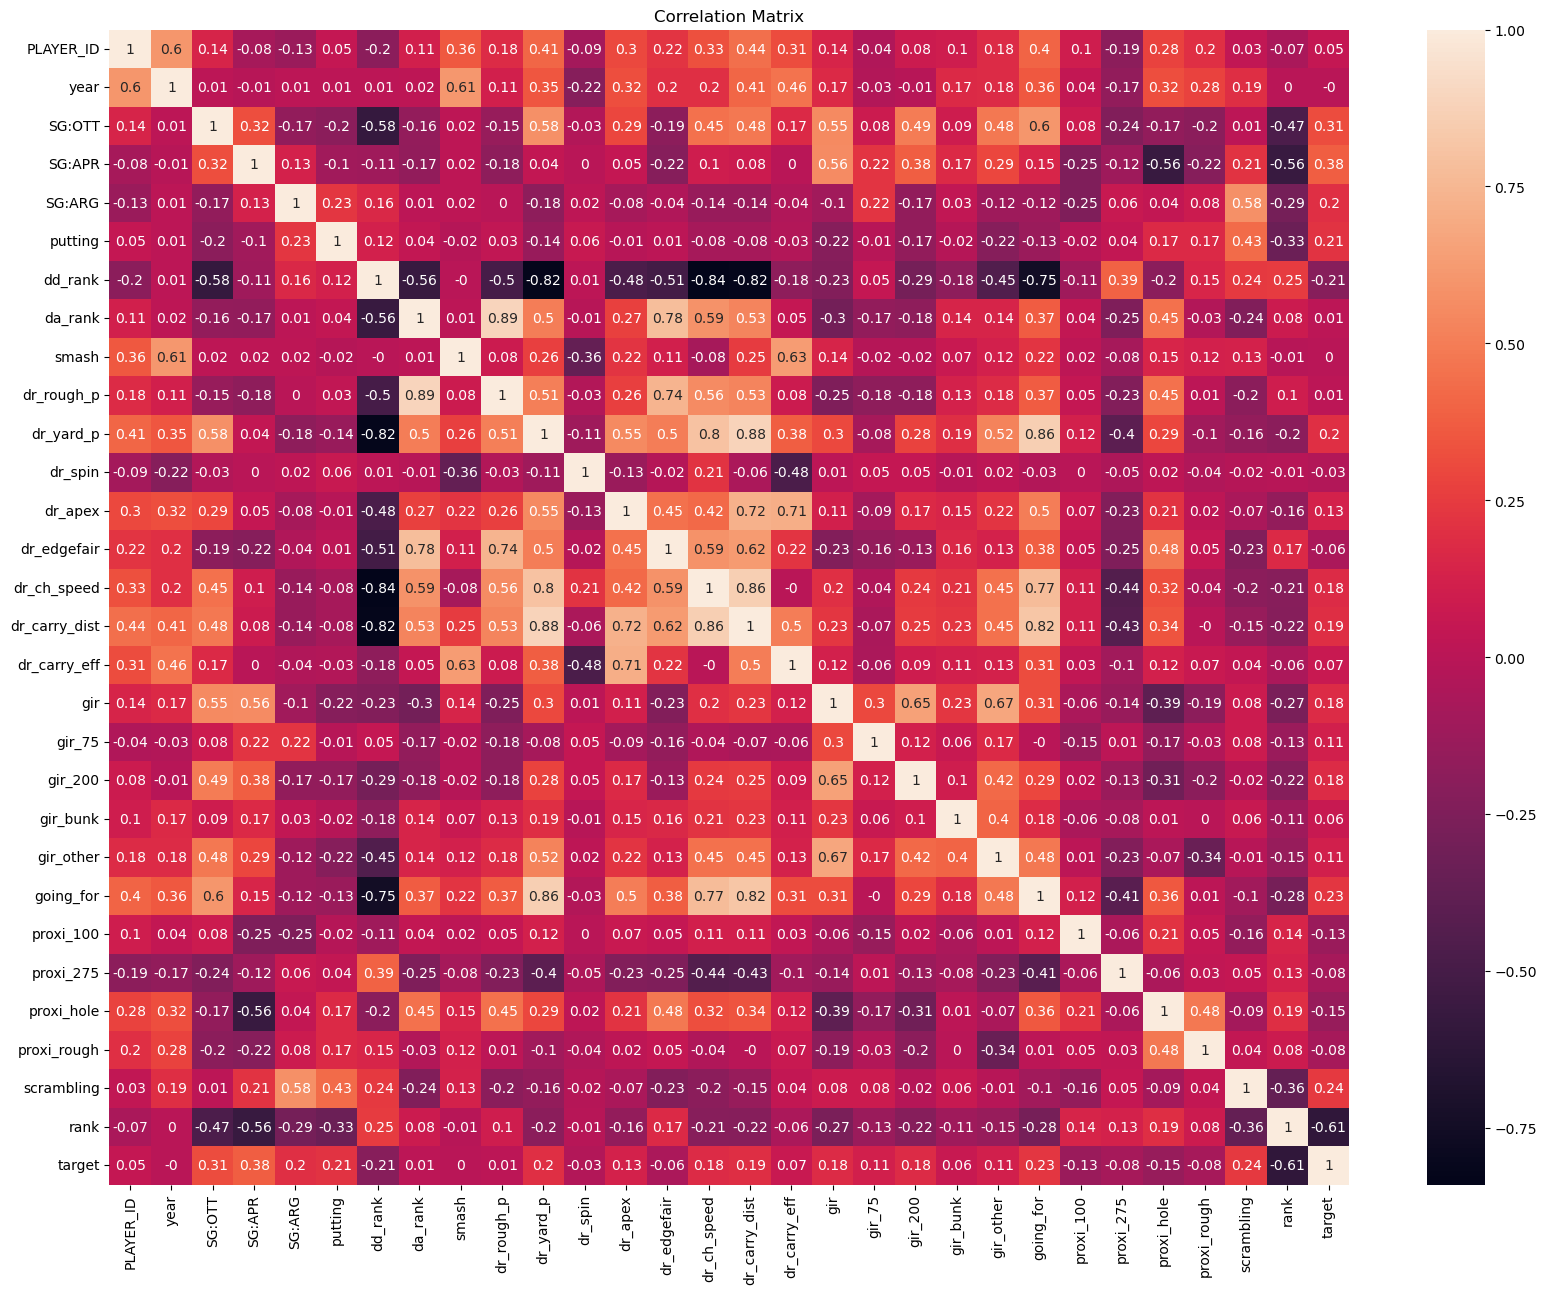

In [1608]:
plt.figure(figsize = [20,15])
corr = df_final.corr(numeric_only = True).round(2)
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix")

# 4- Modeling

## Prepping/splitting the dataset and getting ready to model

In [1369]:
X = df_final.drop(columns = ['PLAYER_ID', 'year', 'PLAYER', "rank", 'target'], axis =1)
y = df_final['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1371]:
X.head()

,SG:OTT,SG:APR,SG:ARG,putting,dd_rank,da_rank,smash,dr_rough_p,dr_yard_p,dr_spin,...,gir_75,gir_200,gir_bunk,gir_other,going_for,proxi_100,proxi_275,proxi_hole,proxi_rough,scrambling
0,1.021,1.194,0.399,-0.301,31,64,1.481,30.47,65.23,2438.5,...,92.62,50.32,58.3,59.27,72.20,13.333333,79.833333,35.000000,41.750000,64.94
1,0.907,0.721,0.309,0.164,1,171,1.503,36.88,66.90,2324.8,...,88.00,49.15,48.6,54.20,71.98,17.083333,70.083333,35.750000,41.750000,61.35
2,0.852,0.564,0.147,0.305,37,26,1.511,26.36,64.93,2606.4,...,90.57,46.97,40.0,55.33,76.17,19.000000,81.500000,36.083333,43.416667,63.27
3,0.487,1.012,0.047,-0.109,134,8,1.493,22.72,62.74,2362.7,...,93.25,48.68,52.7,51.11,58.44,15.833333,89.916667,33.750000,46.000000,59.81
4,0.741,0.610,0.060,0.236,44,40,1.504,27.98,64.93,2465.0,...,88.13,45.03,28.6,51.35,74.52,17.333333,75.583333,34.916667,40.750000,62.10


In [1373]:
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Scaling, Pipeline and Modeling

Let's use a pipeline to scale and grid search various models

### Logistic Regression Grid Search

In [1565]:
params1 = {'penalty': ["l1", "l2", "elasticnet"],
           'solver': ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs'],
           'C': [0.1, 0.5, 1, 2]
         }

LR_pipe_grid = Pipeline([('scale', StandardScaler()),
                          ('grid', GridSearchCV(LogisticRegression(), param_grid=params1))
                         ])

start_time = time.time()
LR_pipe_grid.fit(X_train, y_train)
grid_LR_time = round(time.time() - start_time, 3)
print(grid_LR_time)

grid_score_LR = LR_pipe_grid.score(X_test, y_test)

print(grid_score_LR)
LR1 = LR_pipe_grid['grid'].best_params_['penalty']
LR2 = LR_pipe_grid['grid'].best_params_['solver']
LR3 = LR_pipe_grid['grid'].best_params_['C']

3.434
0.9123505976095617


In [1566]:
print(LR1)
print(LR2)
print(LR3)
print(LR_pipe_grid['grid'].cv_results_['mean_fit_time'].sum())

l1
liblinear
0.5
0.6194281101226806


### Decision Tree Grid Search

In [1553]:
params2 = {'max_depth': [2,3,4,5,6],
           'criterion': ["gini","entropy","log_loss"],
           'min_samples_leaf': [2,3,4]
         }

DT_pipe_grid = Pipeline([('scale', StandardScaler()),
                          ('grid2', GridSearchCV(DecisionTreeClassifier(), param_grid=params2))
                         ])

start_time = time.time()
DT_pipe_grid.fit(X_train, y_train)
grid_DT_time = round(time.time() - start_time, 3)
print(grid_DT_time)

grid_score_DT = DT_pipe_grid.score(X_test, y_test)
    
print(grid_score_DT)
DT1 = DT_pipe_grid['grid2'].best_params_['max_depth']
DT2 = DT_pipe_grid['grid2'].best_params_['criterion']


6.573
0.8605577689243028


In [1554]:
print(DT1)
print(DT2)
print(DT_pipe_grid['grid2'].cv_results_['mean_fit_time'].sum())

4
gini
1.2561616420745851


### KNN Grid Search

In [1573]:
params3 = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
           'weights': ["uniform","distance"]
          }

KNN_pipe_grid = Pipeline([('scale', StandardScaler()),
                          ('grid3', GridSearchCV(KNeighborsClassifier(), param_grid=params3))
                         ])

start_time = time.time()
KNN_pipe_grid.fit(X_train, y_train)
grid_KNN_time = round(time.time() - start_time, 3)
print(grid_KNN_time)

grid_score_KNN = KNN_pipe_grid.score(X_test, y_test)
    
print(grid_score_KNN)
KNN1 = KNN_pipe_grid['grid3'].best_params_['n_neighbors']
KNN2 = KNN_pipe_grid['grid3'].best_params_['weights']

3.886
0.8897742363877822


In [1575]:
print(KNN1)
print(KNN2)
print(KNN_pipe_grid['grid3'].cv_results_['mean_fit_time'].sum())

12
distance
0.027500677108764648


### SVM Grid Search

In [1595]:
params4 = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
           'degree': [2, 3, 4, 5]
          }

SVM_pipe_grid = Pipeline([('scale', StandardScaler()),
                          ('grid4', GridSearchCV(SVC(), param_grid=params4))
                         ])

start_time = time.time()
grid_SVM = SVM_pipe_grid.fit(X_train, y_train)
grid_SVM_time = round(time.time() - start_time, 3)
print(grid_SVM_time)

grid_score_SVM = SVM_pipe_grid.score(X_test, y_test)

print(grid_score_SVM)
SVM1 = SVM_pipe_grid['grid4'].best_params_['kernel']
SVM2 = SVM_pipe_grid['grid4'].best_params_['degree']

5.437
0.9176626826029216


In [1596]:
print(SVM1)
print(SVM2)
print(SVM_pipe_grid['grid4'].cv_results_['mean_fit_time'].sum())

linear
2
0.880386209487915


Because we have a linear SVC model, we can extract the best features directly

In [1640]:
SVM_simple_pipe = Pipeline([('scale', StandardScaler()),
                          ('svm', SVC(kernel="linear"))
                         ])
SVM_simple_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [1657]:
# Same score
SVM_simple_pipe.score(X_test, y_test)

0.9176626826029216

In [1659]:
# Extract coefficients
SVM_simple_pipe['svm'].coef_

array([[ 0.93432648,  0.89499616,  0.34918863,  0.72384486,  0.07000127,
         0.07673962, -0.13583398,  0.28436525,  0.20915032, -0.02142021,
        -0.00741977, -0.18930834,  0.22671641, -0.27347775,  0.28010099,
        -0.17454764,  0.17612805,  0.04364875, -0.0207343 , -0.18630718,
         0.11381053, -0.08235871,  0.12452046, -0.069222  , -0.03978321,
         0.12562465]])

<Axes: title={'center': 'Features sorted by absolute numbers'}>

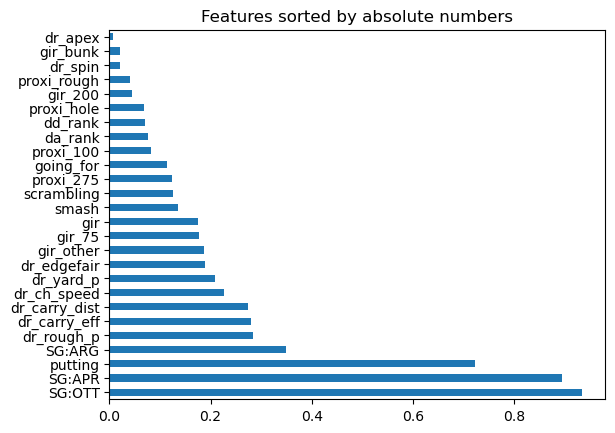

In [1684]:
# Plot in order of importance
plt.title("Features sorted by absolute numbers")
pd.Series(abs(SVM_simple_pipe['svm'].coef_[0]), index=X_train.columns).nlargest(30).plot(kind='barh')

<Axes: title={'center': 'Features sorted by numbers'}>

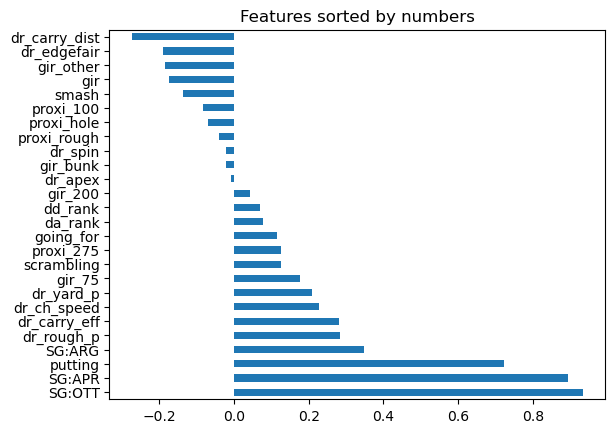

In [1686]:
# Plot in order of importance without absolute
plt.title("Features sorted by numbers")
pd.Series(SVM_simple_pipe['svm'].coef_[0], index=X_train.columns).nlargest(30).plot(kind='barh')

# 5- Evaluation

It seems like our Support Vector model gives us the best results with an accuracy of 91.8% which is very acceptable in our case. This would mean it would have predcited close to 28 players out of 30 every year to make it to the tour championship.

The top 6 features are:
-    1- Strokes gained off the tee
-    2- Strokes gained on approach
-    3- Putting
-    4- Strokes gained around the green
-    5- Avoiding the rough
-    6- Carry Efficiency

# 6- Deployment

So what does this mean in real terms? 

It looks like strokes gained off the tee is the most important features, but looking at other stats the distance (dd_rank) is not as important as avoiding the rough (dr_rough_p) and being efficient at keeping the ball in the fairway (dr_carry_eff). That means a golfer should focus more on accuracy off the tee versus trying to get more distance. This reflects really well for 2024 where the most succesful golfer Scottie Scheffler is not the longest off the tee, but he's one of the most accurate.

Next, we can also see that putting is a really important factor and that proximity to the hole is not (proxi_hole). That means that a great putter can compensate for lacunes in their long game (iron play). This is interesting because personally this is new to me. I always practiced my iron play a lot more for accuracy compared to putting. Putting is no fun to practice but I guess it should be a bigger focus for trainers.